<a href="https://colab.research.google.com/github/RakshithaMaddala/OIBSIP/blob/main/Customer_Segmentation(oasis_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv("/content/sample_data/customer_segmentation_data.csv")

In [ ]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [ ]:
print("missing values per coln:\n",df.isnull().sum())

missing values per coln:
 id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [ ]:
print("Duplicates:",df.duplicated().sum())
df=df.drop_duplicates()

Duplicates: 0


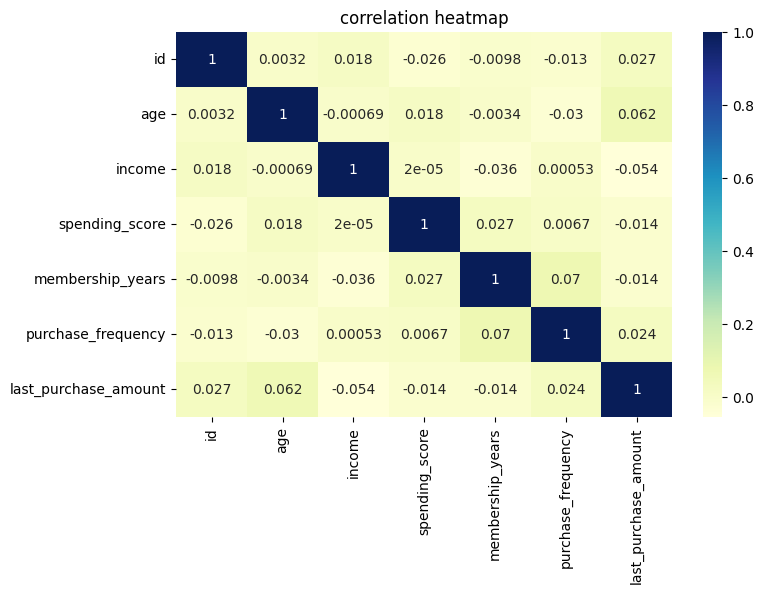

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.title("correlation heatmap")
plt.show()

In [ ]:
avg_age=df['age'].mean()
avg_income=df['income'].mean()
avg_score=df['spending_score'].mean()

In [ ]:
print("\n-----descriptive insights-----")
print(f"average age:{avg_age:2f}")
print(f"average annual income:{avg_income:.2f}k$")
print(f"average spending score:{avg_score:.2f}")



-----descriptive insights-----
average age:43.783000
average annual income:88500.80k$
average spending score:50.69


In [ ]:
x=df[['age','income','spending_score']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
df['Cluster']=kmeans.fit_predict(X_scaled)
print(df.head())

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  Cluster  
0                  24          Groceries                113.53        3  
1                  42             Sports                 41.93        3  
2                  28           Clothing                424.36        1  
3                   5      Home & Garden                991.93        3  
4                  25        Electronics                347.08        1  


In [ ]:
score=silhouette_score(X_scaled,kmeans.labels_)
print(f"Silhouette Score:{score:.2f}")

Silhouette Score:0.28


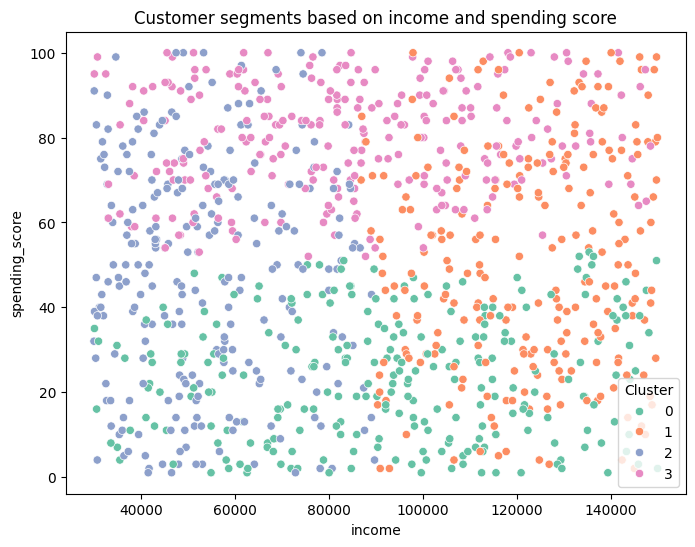

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='income',y='spending_score',hue='Cluster',palette='Set2',data=df)
plt.title("Customer segments based on income and spending score")
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster')[['age', 'income', 'spending_score']].mean()
print("\nCluster Summary:")
print(cluster_summary)

print("\nInsights:")
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    if row['income'] > avg_income and row['spending_score'] > avg_score:
        print("- High income & high spending → Premium customers")
    elif row['income'] < avg_income and row['spending_score'] > avg_score:
        print("- Low income but high spending → Potentially loyal customers")
    elif row['income'] > avg_income and row['spending_score'] < avg_score:
        print("- High income but low spending → Need engagement offers")
    else:
        print("- Low income & low spending → Budget segment")



Cluster Summary:
               age         income  spending_score
Cluster                                          
0        30.916996   93254.569170       23.664032
1        56.572016  122329.444444       51.205761
2        55.477912   54047.931727       47.835341
3        32.941176   85189.819608       79.780392

Insights:

Cluster 0:
- High income but low spending → Need engagement offers

Cluster 1:
- High income & high spending → Premium customers

Cluster 2:
- Low income & low spending → Budget segment

Cluster 3:
- Low income but high spending → Potentially loyal customers
